In [ ]:
import numpy as np
from scipy import ndimage
from skimage import color, io
import time
import matplotlib.pyplot as plt
from skimage import measure
from skimage import feature

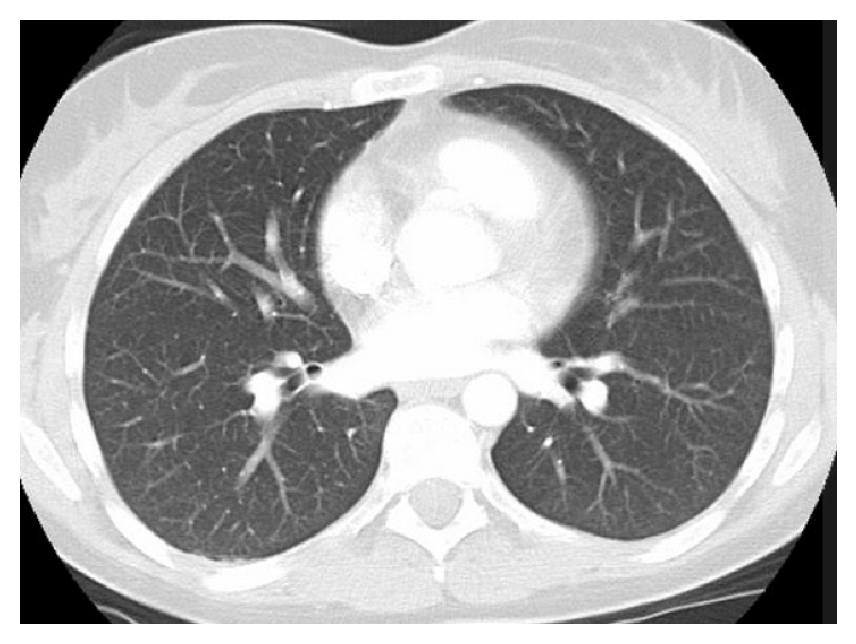

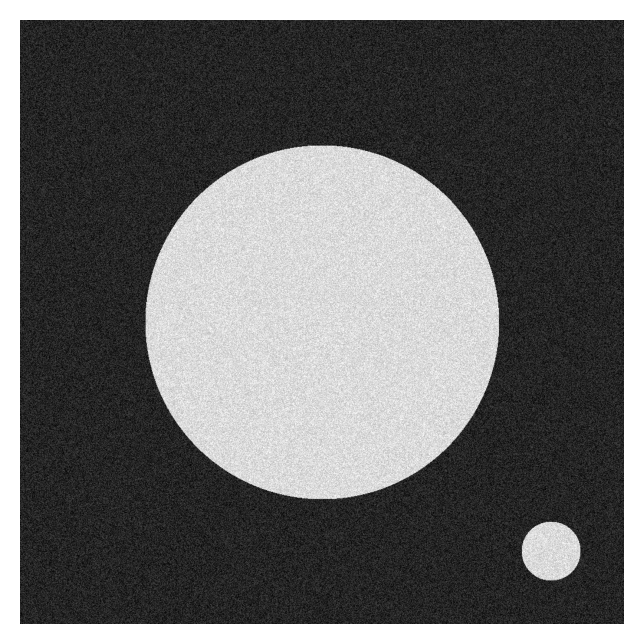

In [ ]:
def normalize(image):
    return (image - np.min(image))/(np.max(image) - np.min(image))

def generate_circle(y_size, x_size, x_origin, y_origin, radius):
    image = np.zeros((y_size, x_size))
    x_grid, y_grid = np.meshgrid(np.arange(x_size), np.arange(y_size))
    indices = np.square((x_grid - x_origin)) + np.square((y_grid-y_origin)) < radius*radius
    image[indices] = 1
    return image

y_size = 1024
x_size = 1024
circle = generate_circle(y_size, x_size, 512, 512, 300)
circle_2 = generate_circle(y_size, x_size, 900, 900, 50)
circle = np.logical_or(circle, circle_2)
circle = circle + (np.random.random((y_size, x_size))-0.5)*0.4
circle = normalize(circle)

image  = normalize(color.rgb2gray(io.imread('CT_lungs.png')))

plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.figure(dpi=200)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.show()

plt.show()

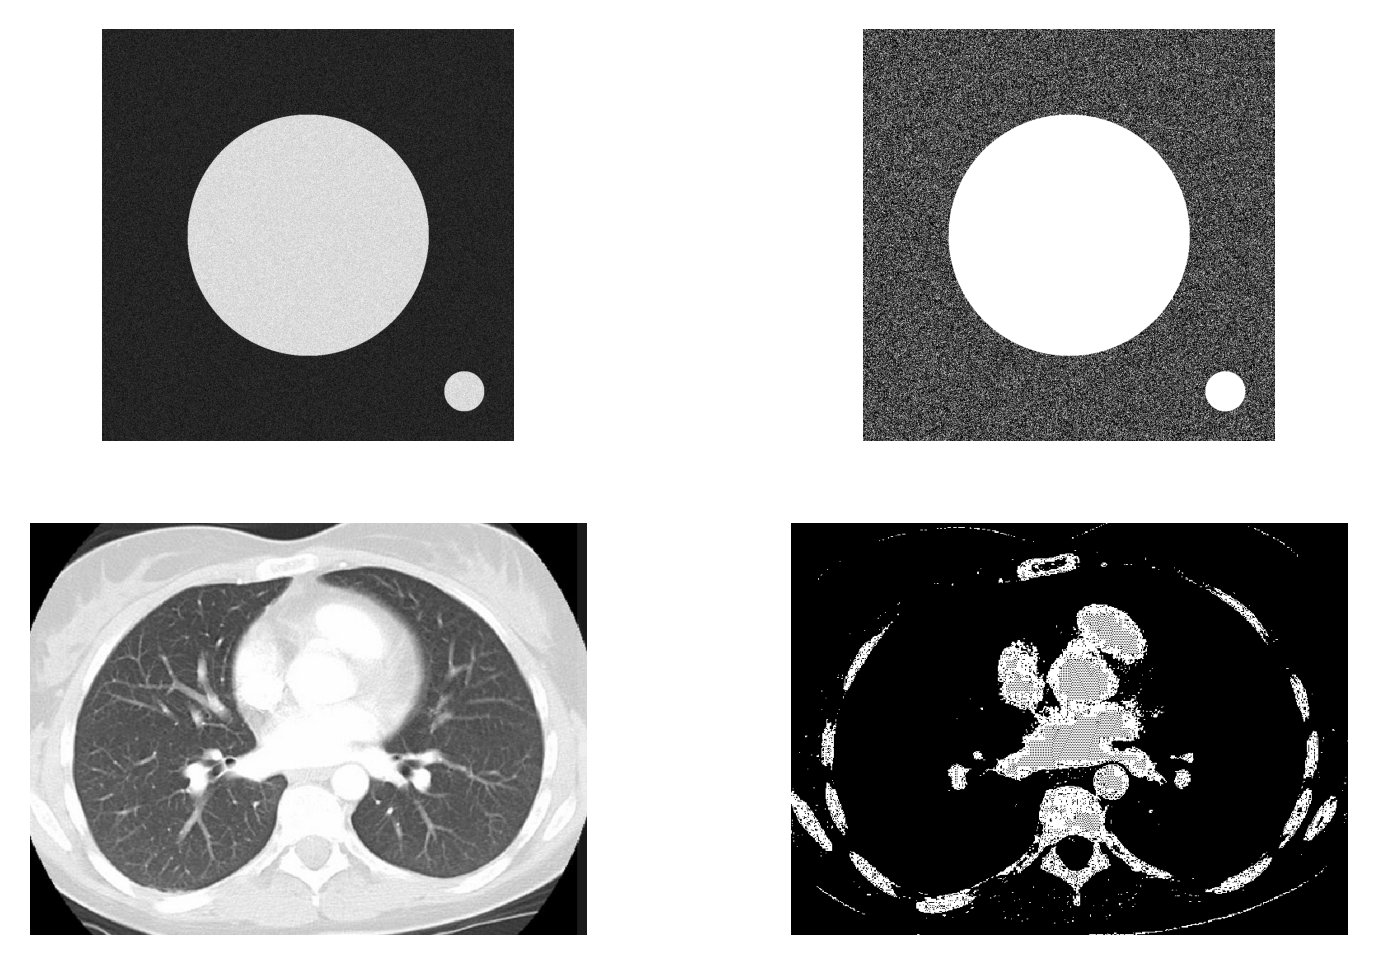

In [ ]:
def image_threshold(image, lower, upper):
    return np.logical_and(image > lower, image < upper)

circle_thresholded = image_threshold(circle, 0.2, 1)
image_thresholded = image_threshold(image, 0.95, 1)

plt.figure(dpi=300)
plt.subplot(2, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(circle_thresholded, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(image_thresholded, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
def region_growing_global(image, seed, bottom_threshold, upper_threshold):
  # seed - (y, x)
  # bottom_threshold, upper_threhold - seed_intensity - bottom_threshold, seed_intensity + upper_threshold

  # analiza blobow
  pass

In [ ]:
def region_growing_local(image, seed, bottom_threshold, upper_threshold):

  # breadth-first search / deep-first search, queue/stack
  pass

In [ ]:
# TO DO - porownac czas dzialania obu wersji

In [ ]:
center = (int(circle.shape[0] / 2) - 1, int(circle.shape[1] / 2) - 1)
circle_region_global = region_growing_global(circle, center, 0.2, 0.2)
circle_region_local = region_growing_local(circle, center, 0.2, 0.2)

# MSE - global/local

plt.figure(dpi=300)
plt.subplot(1, 3, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(circle_region_global, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(circle_region_local, cmap='gray')
plt.axis('off')

plt.show()


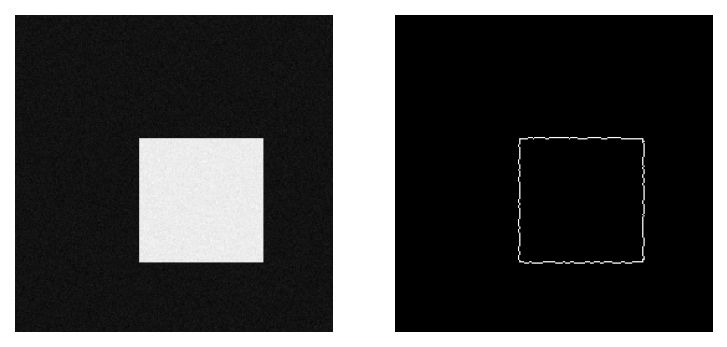

In [ ]:
y_size, x_size = 256, 256
image = np.zeros((y_size, x_size))
image[100:200, 100:200] = 1
image = image + np.random.randn(y_size, x_size)*0.02

skimage_canny = feature.canny(image)
plt.figure(dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(skimage_canny, cmap='gray')
plt.axis('off')
plt.show()

Calculated Ostu threshold equals to: 120


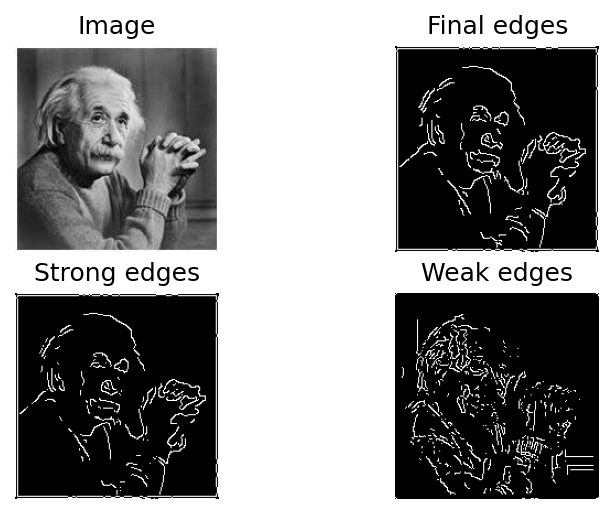

In [ ]:
import numpy as np
import scipy.ndimage as nd
from skimage import color, io
import matplotlib.pyplot as plt


def gaussian_smoothing(image, sigma):
  return nd.gaussian_filter(image, sigma)


def calculate_gradients(image):
  grad_y, grad_x = np.gradient(image)
  gradient_magnitude = np.sqrt(grad_y**2+grad_x**2)
  shape = grad_x.shape
  # prevention from division by 0:
  grad_x = grad_x.ravel()
  for index in range(len(grad_x)):
    if grad_x[index] == 0:
      grad_x[index] = 0.000001
  grad_x = grad_x.reshape(shape)
  # calculating angle
  arg = grad_y/grad_x
  gradient_angle = np.degrees(np.arctan(arg))
  ''' for debugging purpose:
  print(f"Shape of the image {image.shape}")
  print(f"Max of gradient angle: {np.max(gradient_angle)}")
  print(f"Min of gradient angle: {np.min(gradient_angle)}")
  print(f"Max of gradient magnitude: {np.max(gradient_magnitude)}")
  print(f"Min of gradient magnitude: {np.min(gradient_magnitude)}")'''
  return gradient_magnitude, gradient_angle


def non_maximum_supression(gradient_magnitude, gradient_angle):
  potential_edges = np.copy(gradient_magnitude)
  for y_index in range(gradient_magnitude.shape[0]-2):
    for x_index in range(gradient_magnitude.shape[1]-2):
      if gradient_angle[y_index+1, x_index+1] < -67.5 or gradient_angle[y_index+1, x_index+1] >= 67.5:
        if gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index, x_index+1] or gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index+2, x_index+1]:
          potential_edges[y_index+1, x_index+1] = 0
        else:
          pass
          # potential_edges[y_index+1, x_index+1] = 1
      elif gradient_angle[y_index+1, x_index+1] < -22.5 and gradient_angle[y_index+1, x_index+1] >= -67.5:
        if gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index, x_index+2] or gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index+2, x_index]:
          potential_edges[y_index+1, x_index+1] = 0
        else:
          pass
          # potential_edges[y_index+1, x_index+1] = 1
      elif gradient_angle[y_index+1, x_index+1] < 22.5 and gradient_angle[y_index+1, x_index+1] >= -22.5:
        if gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index+1, x_index] or gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index+1, x_index+2]:
          potential_edges[y_index+1, x_index+1] = 0
        else:
          pass
          # potential_edges[y_index+1, x_index+1] = 1
      elif gradient_angle[y_index+1, x_index+1] < 67.5 and gradient_angle[y_index+1, x_index+1] >= 22.5:
        if gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index, x_index] or gradient_magnitude[y_index+1, x_index+1] < gradient_magnitude[y_index+2, x_index+2]:
          potential_edges[y_index+1, x_index+1] = 0
        else:
          pass
          # potential_edges[y_index+1, x_index+1] = 1
  return potential_edges


def otsu_threshold(image):
  hist, bins = np.histogram(image, bins=256)
  distr = np.cumsum(hist) / np.sum(hist)

  """For debugging purpose
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  plt.bar(range(len(hist)), hist, 1)
  plt.title("Histogram of img")
  plt.subplot(1,2,2)
  plt.bar(range(len(hist)), distr, 1)
  plt.title("Normalized cumsum of img")
  plt.show()"""

  val_max = np.NINF
  threshold = -1

  for t in range(1,256):
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2
    val = q1 / np.sum(hist) * q2 / np.sum(hist) * np.power(m1-m2,2)
    if val > val_max:
      val_max = val
      threshold = t
  return threshold


def double_threshold(potential_edges, gradient_magnitude):
  strong_thres = otsu_threshold(gradient_magnitude)
  weak_thres = int(strong_thres/3)

  strong_edges = np.zeros(potential_edges.ravel().shape)
  weak_edges = np.zeros(potential_edges.ravel().shape)

  for index in range(potential_edges.ravel().shape[0]):
    if potential_edges.ravel()[index] > strong_thres:
      strong_edges[index] = 1
    elif potential_edges.ravel()[index] > weak_thres:
      weak_edges[index] = 1

  strong_edges = np.reshape(strong_edges, potential_edges.shape)
  weak_edges = np.reshape(weak_edges, potential_edges.shape)

  return strong_edges, weak_edges
 

def edge_hysteresis(strong_edges, weak_edges):
  final_edges = np.copy(strong_edges)
  M, N = strong_edges.shape  
  for i in range(1, M-1):
    for j in range(1, N-1):
      if (weak_edges[i, j] == 1):
        try:
          if ((strong_edges[i+1, j-1] == 1) or (strong_edges[i+1, j] == 1) or (strong_edges[i+1, j+1] == 1) or (strong_edges[i, j-1] == 1) or (strong_edges[i, j+1] == 1) or (strong_edges[i-1, j-1] == 1) or (strong_edges[i-1, j] == 1) or (strong_edges[i-1, j+1] == 1)):
            final_edges[i, j] = 1
        except IndexError as e:
          pass
  return final_edges


def normalize_to_0_255(image):
  return (image - np.min(image)) / (np.max(image) - np.min(image)) * 255


def canny(image, sigma=1.0):
  # Dokonaj filtracji obrazu filtrem Gaussa o zadanej sigmie
  image = gaussian_smoothing(image, sigma)
  # Wyznacz przybliżenie gradientu (jego magnitude oraz kąt) za pomocą filtru Sobela
  grad_magnitude, grad_angle = calculate_gradients(image)
  # Przeprowadź "non_maximum_supression" korzystając z magnitudy i kąta gradientu, wyznaczając tym samym potencjalnie krawędzie.
  potential_edges = non_maximum_supression(grad_magnitude, grad_angle)
  potential_edges = normalize_to_0_255(potential_edges).astype('uint8')
  # Dokonaj podwójnego progowania potencjalnych krawędzi aby wyznaczyć krawędzie silne oraz krawędzie słabe.
  threshold = otsu_threshold(image)
  print(f"Calculated Ostu threshold equals to: {threshold}")
  strong_edges, weak_edges = double_threshold(potential_edges, grad_magnitude)
  # Przeprowadz histerezę krawędzi, zwróć wynik.
  edges = edge_hysteresis(strong_edges, weak_edges)
  return edges, strong_edges, weak_edges


def normalize(image):
    return (image - np.min(image))/(np.max(image) - np.min(image))


ct_image  = normalize(color.rgb2gray(io.imread('einstein.jpg')))
my_edges, strong_edges, weak_edges = canny(ct_image)

plt.figure(dpi=150, figsize=(6,4))
plt.subplot(2, 2, 1)
plt.imshow(ct_image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(2, 2, 2)
plt.imshow(my_edges, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Final edges")
plt.subplot(2, 2, 3)
plt.imshow(strong_edges, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Strong edges")
plt.subplot(2, 2, 4)
plt.imshow(weak_edges, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Weak edges")
plt.show()

In [ ]:
# Algorytm rozrostu obszarów - wersja lokalna

def region_growing_local(image, seed, bottom_threshold, upper_threshold):
  # seed - (y, x)
  seed_intensity = image[seed]
  bottom_threshold, upper_threshold = seed_intensity - bottom_threshold, seed_intensity + upper_threshold
 
  # analiza blobow
 
  kolejka = [seed]
 
  wynik = np.zeros(image.shape)
  wielkosc_obszaru = 1
  srednia = image[seed]
 
 
  def nie_odwiedzony(p):
    y, x = p
    return  wynik[p] == 0 and 0 <= y < image.shape[0]  and 0 <= x < image.shape[1]
 
  def nowi_sasiedzi(p):
    py, px = p
    return [(y, x) 
      for x in range(px -1, px + 2)
      for y in range(py -1, py + 2)
      if (y, x) != p and nie_odwiedzony((y, x))]
 
  while (len(kolejka)):
    sasiedzi = nowi_sasiedzi(kolejka.pop(0))
    for sasiad in sasiedzi:
 
      if bottom_threshold <= image[sasiad] < upper_threshold:
        wynik[sasiad] = 1
        kolejka.append(sasiad)
        srednia = srednia * wielkosc_obszaru / (wielkosc_obszaru + 1) + image[sasiad] / (wielkosc_obszaru + 1)
        wielkosc_obszaru += 1
        bottom_threshold, upper_threshold = srednia - bottom_threshold, srednia + upper_threshold
      else:
        wynik[sasiad] = 2
 
  wygladz = np.vectorize(lambda x: 1 if x == 1 else 0)
 
  wynik = wygladz(wynik)     
  return wynik

In [ ]:
# # Algorytm rozrostu obszarów - wersja globalna

def region_growing_local(image, seed, bottom_threshold, upper_threshold):
  # seed - (y, x)
  seed_intensity = image[seed]
  bottom_threshold, upper_threshold = seed_intensity - bottom_threshold, seed_intensity + upper_threshold
 
  # analiza blobow
 
  kolejka = [seed]
 
  wynik = np.zeros(image.shape)
  wielkosc_obszaru = 1
  srednia = image[seed]
 
 
  def nie_odwiedzony(p):
    y, x = p
    return  wynik[p] == 0 and 0 <= y < image.shape[0]  and 0 <= x < image.shape[1]
 
  def nowi_sasiedzi(p):
    py, px = p
    return [(y, x) 
      for x in range(px -1, px + 2)
      for y in range(py -1, py + 2)
      if (y, x) != p and nie_odwiedzony((y, x))]
 
  while (len(kolejka)):
    sasiedzi = nowi_sasiedzi(kolejka.pop(0))
    for sasiad in sasiedzi:
 
      if bottom_threshold <= image[sasiad] < upper_threshold:
        wynik[sasiad] = 1
        kolejka.append(sasiad)
        srednia = srednia * wielkosc_obszaru / (wielkosc_obszaru + 1) + image[sasiad] / (wielkosc_obszaru + 1)
        wielkosc_obszaru += 1
        bottom_threshold, upper_threshold = srednia - bottom_threshold, srednia + upper_threshold
      else:
        wynik[sasiad] = 2
 
  wygladz = np.vectorize(lambda x: 1 if x == 1 else 0)
 
  wynik = wygladz(wynik)     
  return wynik

In [ ]:
def region_growing_global(image, seed, bottom_threshold, upper_threshold):
  # seed - (y, x)
  seed_intensity = image[seed]
  bottom_threshold, upper_threshold = seed_intensity - bottom_threshold, seed_intensity + upper_threshold
 
  wynik = np.zeros(image.shape)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]): 
      if bottom_threshold <= image[y,x] < upper_threshold:
        wynik[y,x] = 1
 
  kolejka = []
  znaleziono = False
 
  def nowi_sasiedzi(p):
    py, px = p
    return [(y, x) 
      for x in range(px -1, px + 2)
      for y in range(py -1, py + 2)
      if (y, x) != p and wynik[y, x]==1]
 
 
 
  for y in range(wynik.shape[0]):
    for x in range(wynik.shape[1]): 
      if wynik[y,x]==1:
        kolejka.append((y,x))
        wynik[y,x]=2
        while (len(kolejka)):
          sasiedzi = nowi_sasiedzi(kolejka.pop(0))
          for sasiad in sasiedzi:
            wynik[sasiad]=2
            kolejka.append(sasiad)
            if sasiad == seed:
              znaleziono = True
        if not znaleziono:
          wynik = np.array([punkt%2 for punkt in wynik.flatten()])
          wynik = np.reshape(wynik, image.shape)
      if znaleziono:
        break
    if znaleziono:
        break
 
  wygladz = np.vectorize(lambda x: 1 if x == 2 else 0)
  wynik = wygladz(wynik)
    
  return wynik


def region_growing_global(image, seed, bottom_threshold, upper_threshold):
  #binaryzacja obrazu
  img_extraction= image_threshold(image, image[seed] - bottom_threshold, image[seed] + upper_threshold )
  # analiza blobow
  img_extraction = nd.binary_dilation(img_extraction , np.ones((3, 3)))  #czyszczenie orbazu przez dylatacje 
  all_labels= measure.label(img_extraction)
  seed_label = all_labels[seed]
  new_img = np.equal(all_labels, seed_label)
  return all_labels, new_img

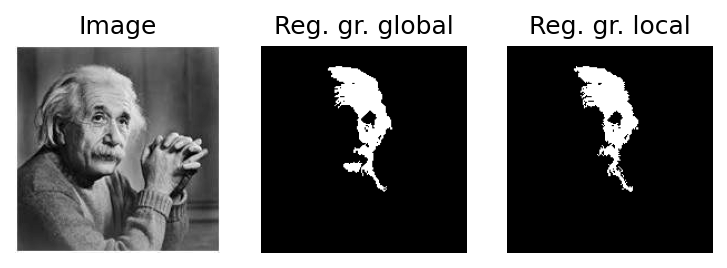

In [ ]:
ct_image_global = region_growing_global(ct_image, (100, 100), 0, 1)
ct_image_local = region_growing_local(ct_image, (100, 100), 0, 1)

plt.figure(dpi=150)
plt.subplot(1,3,1)
plt.imshow(ct_image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1,3,2)
plt.imshow(ct_image_global, cmap='gray')
plt.axis('off')
plt.title("Reg. gr. global")
plt.subplot(1,3,3)
plt.imshow(ct_image_local, cmap='gray')
plt.axis('off')
plt.title("Reg. gr. local")
plt.show()